In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
!wget https://github.com/jeanchabanol/TER-MIASHS-Sujet-1/raw/main/Donnees/Donn%C3%A9es%20Reddit/Donn%C3%A9es%20r%C3%A9duites/Donn%C3%A9es%20pas%20suicides%20CSV/donnees_reddit_pas_TS.csv -nv
data_non_ts = pd.read_csv("donnees_reddit_pas_TS.csv",sep=",", encoding='cp1252')
#Corpus = pd.read_csv("test.csv") A mettre comme ça parce que moi j'avais un bugg (et ca separe les mots de cotent par des ,)

2021-12-13 15:31:34 URL:https://raw.githubusercontent.com/jeanchabanol/TER-MIASHS-Sujet-1/main/Donnees/Donn%C3%A9es%20Reddit/Donn%C3%A9es%20r%C3%A9duites/Donn%C3%A9es%20pas%20suicides%20CSV/donnees_reddit_pas_TS.csv [9591956/9591956] -> "donnees_reddit_pas_TS.csv.6" [1]


In [3]:
!wget https://github.com/jeanchabanol/TER-MIASHS-Sujet-1/raw/main/Donnees/Donn%C3%A9es%20Reddit/Donn%C3%A9es%20r%C3%A9duites/Donn%C3%A9es%20suicides%20CSV/donnees_reddit_TS.csv -nv
data_ts = pd.read_csv("donnees_reddit_TS.csv",sep=",", encoding='cp1252')


2021-12-13 15:31:35 URL:https://raw.githubusercontent.com/jeanchabanol/TER-MIASHS-Sujet-1/main/Donnees/Donn%C3%A9es%20Reddit/Donn%C3%A9es%20r%C3%A9duites/Donn%C3%A9es%20suicides%20CSV/donnees_reddit_TS.csv [7443588/7443588] -> "donnees_reddit_TS.csv.6" [1]


In [4]:
data=pd.concat([data_non_ts, data_ts])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11180 entries, 0 to 4722
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   suicide    11180 non-null  bool  
 1   subreddit  11180 non-null  object
 2   content    11180 non-null  object
dtypes: bool(1), object(2)
memory usage: 272.9+ KB


,suicide,subreddit,content
0,False,AskReddit,"Suicide survivors of reddit, what's one thing ..."
1,False,AskReddit,"Suicide survivors of Reddit, are you happier n..."
2,False,AskReddit,"Suicide survivors of Reddit, what went through..."
3,False,AskReddit,"[Serious] Suicide survivors of reddit, what we..."
4,False,AskReddit,Suicide survivors of Reddit. What were your as...


False    6457
True     4723
Name: suicide, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


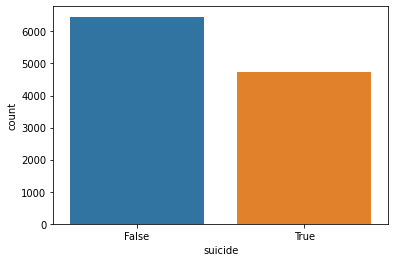

In [5]:
print(data['suicide'].value_counts())
sns.countplot(data.suicide)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9446 entries, 3480 to 4722
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   suicide    9446 non-null   bool  
 1   subreddit  9446 non-null   object
 2   content    9446 non-null   object
dtypes: bool(1), object(2)
memory usage: 230.6+ KB
True     4723
False    4723
Name: suicide, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


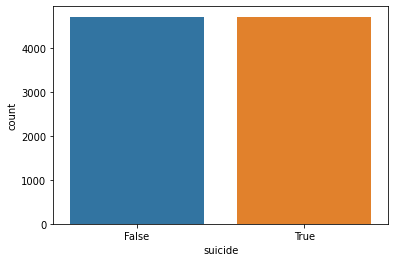

In [6]:
data_non_ts_reduit=data_non_ts.sample(4723)
data=[]
data=pd.concat([data_non_ts_reduit, data_ts])
data.info()
print(data['suicide'].value_counts())
sns.countplot(data.suicide)

In [7]:
#Ici, nous cherchons à binariser la variable race
#data["suicide"] = data["suicide"].replace({True: 0, False: 1})

In [8]:
#change content en unicode
documents= data['content'].values.astype("U")
#On vectorise
vectorizer= TfidfVectorizer(stop_words='english')
features =vectorizer.fit_transform(documents)


In [9]:
X = features
y = data["suicide"]

# **TRAIN TEST CLASSIFICATION**

In [10]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.4)

In [11]:
# On instancie le modèle
model=KMeans(2)
#On entraine le modèle sur le jeu d'entrainement
model.fit(X_train)

KMeans(n_clusters=2)

In [12]:
Y_pred=model.predict(X_test)
df_confusion = pd.crosstab(y_test,Y_pred,rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

Predicted     0     1   All
Actual                     
False      1367   462  1829
True        749  1201  1950
All        2116  1663  3779


In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(('\nClasification report:\n'), classification_report(y_test, Y_pred))
print(('\nConfusion matrix:\n'),confusion_matrix(y_test, Y_pred))


Clasification report:
               precision    recall  f1-score   support

       False       0.65      0.75      0.69      1829
        True       0.72      0.62      0.66      1950

    accuracy                           0.68      3779
   macro avg       0.68      0.68      0.68      3779
weighted avg       0.69      0.68      0.68      3779


Confusion matrix:
 [[1367  462]
 [ 749 1201]]


# **CROSS VALIDATION**

In [14]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold


In [15]:
y_pred = cross_val_predict(model, X, y, cv=5)
print("Binary classification-----")
cm = confusion_matrix(y, y_pred)
recall = np.diag(cm) / np.sum(cm, axis=1)
precision = np.diag(cm) / np.sum(cm, axis=0)

print("confusion matrice\n" , cm)
        
print(classification_report(y, y_pred))

Binary classification-----
confusion matrice
 [[2580 2143]
 [1743 2980]]
              precision    recall  f1-score   support

       False       0.60      0.55      0.57      4723
        True       0.58      0.63      0.61      4723

    accuracy                           0.59      9446
   macro avg       0.59      0.59      0.59      9446
weighted avg       0.59      0.59      0.59      9446



In [16]:
cross_val_score(model, X, y, cv=5, scoring='accuracy')

array([0.25555556, 0.76654314, 0.68448915, 0.66543145, 0.39438857])